In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
# from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
#from tensorflow.keras.optimizers import Adam
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

# input file path
datasetdir = "D://indivdual_models//Dataset//2022_MC9K_single_drug"
resultdir = "D://indivdual_models//Result//Model_generation//2022_MC9K_single_drug"

C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\BGM18\.conda\envs\ronny_keras\lib\site-packages\tensorf

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7395642106390459641
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 8267490918
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15138790993919417957
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [2]:
drug_list = ["AEW541","Nilotinib","17-AAG","PHA-665752","Lapatinib","Nutlin-3"
            ,"AZD0530","PF2341066","L-685458","ZD-6474","Panobinostat","Sorafenib"
            ,"Irinotecan","Topotecan","LBW242","PD-0325901","PD-0332991","Paclitaxel"
            ,"PLX4720","RAF265","TAE684","TKI258","Erlotinib","AZD6244"]

In [3]:
# hyperparameters of CNN
num_classes = 1
learning_rate = 0.0002
training_epochs = 40
batch_size = 50
# img_rows, img_cols = 154, 154


Starttime: 20221007
AEW541_//n
train_X shape: (303, 21213)
303 train samples
75 test samples
train_X shape: (303, 21213, 1)
303 train samples
75 test samples
StartTime : 2022-10-07 15:54:36.359397

StartTime : 2022-10-07 15:54:36.652733

Train on 303 samples, validate on 75 samples
Epoch 1/40
303/303 [==============================] - 2s 6ms/step - loss: 3.1219 - mse: 3.1219 - mae: 1.6809 - val_loss: 2.7587 - val_mse: 2.7587 - val_mae: 1.5354
Epoch 2/40
303/303 [==============================] - 0s 325us/step - loss: 2.9982 - mse: 2.9982 - mae: 1.6454 - val_loss: 2.5583 - val_mse: 2.5583 - val_mae: 1.4787
Epoch 3/40
303/303 [==============================] - 0s 320us/step - loss: 2.7237 - mse: 2.7237 - mae: 1.5624 - val_loss: 2.1026 - val_mse: 2.1026 - val_mae: 1.3361
Epoch 4/40
303/303 [==============================] - 0s 320us/step - loss: 2.1560 - mse: 2.1560 - mae: 1.3647 - val_loss: 1.2903 - val_mse: 1.2903 - val_mae: 1.0361
Epoch 5/40
303/303 [==============================] - 0

Epoch 4/40
248/248 [==============================] - 0s 322us/step - loss: 3.7212 - mse: 3.7212 - mae: 1.8663 - val_loss: 3.0908 - val_mse: 3.0908 - val_mae: 1.6730
Epoch 5/40
248/248 [==============================] - 0s 311us/step - loss: 3.1504 - mse: 3.1504 - mae: 1.6858 - val_loss: 2.4181 - val_mse: 2.4181 - val_mae: 1.4363
Epoch 6/40
248/248 [==============================] - 0s 306us/step - loss: 2.4001 - mse: 2.4001 - mae: 1.3873 - val_loss: 1.6480 - val_mse: 1.6480 - val_mae: 1.0615
Epoch 7/40
248/248 [==============================] - 0s 297us/step - loss: 1.7533 - mse: 1.7533 - mae: 1.0165 - val_loss: 1.2829 - val_mse: 1.2829 - val_mae: 0.7366
Epoch 8/40
248/248 [==============================] - 0s 366us/step - loss: 1.7208 - mse: 1.7208 - mae: 0.8464 - val_loss: 1.3592 - val_mse: 1.3592 - val_mae: 0.6592
Epoch 9/40
248/248 [==============================] - 0s 338us/step - loss: 1.6314 - mse: 1.6314 - mae: 0.7944 - val_loss: 1.1890 - val_mse: 1.1890 - val_mae: 0.6169
Epoc

Epoch 11/40
302/302 [==============================] - 0s 406us/step - loss: 2.6185 - mse: 2.6185 - mae: 1.2705 - val_loss: 3.0454 - val_mse: 3.0454 - val_mae: 1.3852
Epoch 12/40
302/302 [==============================] - 0s 396us/step - loss: 2.4910 - mse: 2.4910 - mae: 1.2544 - val_loss: 3.0216 - val_mse: 3.0216 - val_mae: 1.3786
Epoch 13/40
302/302 [==============================] - 0s 369us/step - loss: 2.5611 - mse: 2.5611 - mae: 1.2630 - val_loss: 3.0245 - val_mse: 3.0245 - val_mae: 1.3978
Epoch 14/40
302/302 [==============================] - 0s 356us/step - loss: 2.5181 - mse: 2.5181 - mae: 1.2665 - val_loss: 3.0056 - val_mse: 3.0056 - val_mae: 1.3891
Epoch 15/40
302/302 [==============================] - 0s 348us/step - loss: 2.4754 - mse: 2.4754 - mae: 1.2297 - val_loss: 3.0208 - val_mse: 3.0208 - val_mae: 1.3278
Epoch 16/40
302/302 [==============================] - 0s 335us/step - loss: 2.5692 - mse: 2.5692 - mae: 1.2627 - val_loss: 3.0688 - val_mse: 3.0688 - val_mae: 1.321

302/302 [==============================] - 0s 353us/step - loss: 0.5686 - mse: 0.5686 - mae: 0.4620 - val_loss: 0.1455 - val_mse: 0.1455 - val_mae: 0.2287
Epoch 18/40
302/302 [==============================] - 0s 363us/step - loss: 0.5134 - mse: 0.5134 - mae: 0.4410 - val_loss: 0.1445 - val_mse: 0.1445 - val_mae: 0.2069
Epoch 19/40
302/302 [==============================] - 0s 381us/step - loss: 0.5097 - mse: 0.5097 - mae: 0.4479 - val_loss: 0.1400 - val_mse: 0.1400 - val_mae: 0.2350
Epoch 20/40
302/302 [==============================] - 0s 334us/step - loss: 0.4759 - mse: 0.4759 - mae: 0.4477 - val_loss: 0.1795 - val_mse: 0.1795 - val_mae: 0.3581
Epoch 21/40
302/302 [==============================] - 0s 305us/step - loss: 0.4878 - mse: 0.4878 - mae: 0.4799 - val_loss: 0.1883 - val_mse: 0.1883 - val_mae: 0.3729
Epoch 22/40
302/302 [==============================] - 0s 315us/step - loss: 0.4890 - mse: 0.4890 - mae: 0.4563 - val_loss: 0.1341 - val_mse: 0.1341 - val_mae: 0.1932
Epoch 23/4

Epoch 24/40
303/303 [==============================] - 0s 319us/step - loss: 0.8272 - mse: 0.8272 - mae: 0.6276 - val_loss: 0.4178 - val_mse: 0.4178 - val_mae: 0.5011
Epoch 25/40
303/303 [==============================] - 0s 349us/step - loss: 0.8097 - mse: 0.8097 - mae: 0.6127 - val_loss: 0.4056 - val_mse: 0.4056 - val_mae: 0.4537
Epoch 26/40
303/303 [==============================] - 0s 337us/step - loss: 0.8474 - mse: 0.8474 - mae: 0.6065 - val_loss: 0.4035 - val_mse: 0.4035 - val_mae: 0.4453
Epoch 27/40
303/303 [==============================] - 0s 325us/step - loss: 0.8555 - mse: 0.8555 - mae: 0.6224 - val_loss: 0.4104 - val_mse: 0.4104 - val_mae: 0.4923
Epoch 28/40
303/303 [==============================] - 0s 324us/step - loss: 0.8407 - mse: 0.8407 - mae: 0.6219 - val_loss: 0.4062 - val_mse: 0.4062 - val_mae: 0.4822
Epoch 29/40
303/303 [==============================] - 0s 339us/step - loss: 0.8176 - mse: 0.8176 - mae: 0.6133 - val_loss: 0.4046 - val_mse: 0.4046 - val_mae: 0.479

Epoch 31/40
303/303 [==============================] - 0s 372us/step - loss: 0.2031 - mse: 0.2031 - mae: 0.3310 - val_loss: 0.7199 - val_mse: 0.7199 - val_mae: 0.2369
Epoch 32/40
303/303 [==============================] - 0s 372us/step - loss: 0.2324 - mse: 0.2324 - mae: 0.3618 - val_loss: 0.7341 - val_mse: 0.7341 - val_mae: 0.1891
Epoch 33/40
303/303 [==============================] - 0s 369us/step - loss: 0.2194 - mse: 0.2194 - mae: 0.3504 - val_loss: 0.7270 - val_mse: 0.7270 - val_mae: 0.2004
Epoch 34/40
303/303 [==============================] - 0s 349us/step - loss: 0.1941 - mse: 0.1941 - mae: 0.3185 - val_loss: 0.7352 - val_mse: 0.7352 - val_mae: 0.1719
Epoch 35/40
303/303 [==============================] - 0s 349us/step - loss: 0.2127 - mse: 0.2127 - mae: 0.3364 - val_loss: 0.7289 - val_mse: 0.7289 - val_mae: 0.1716
Epoch 36/40
303/303 [==============================] - 0s 346us/step - loss: 0.1953 - mse: 0.1953 - mae: 0.3199 - val_loss: 0.7167 - val_mse: 0.7167 - val_mae: 0.268

303/303 [==============================] - 0s 369us/step - loss: 0.6327 - mse: 0.6327 - mae: 0.5574 - val_loss: 0.7921 - val_mse: 0.7921 - val_mae: 0.6469
Epoch 38/40
303/303 [==============================] - 0s 300us/step - loss: 0.6175 - mse: 0.6175 - mae: 0.5659 - val_loss: 0.8151 - val_mse: 0.8151 - val_mae: 0.5905
Epoch 39/40
303/303 [==============================] - 0s 339us/step - loss: 0.6463 - mse: 0.6463 - mae: 0.5338 - val_loss: 0.8066 - val_mse: 0.8066 - val_mae: 0.6048
Epoch 40/40
303/303 [==============================] - 0s 331us/step - loss: 0.6012 - mse: 0.6012 - mae: 0.5392 - val_loss: 0.7938 - val_mse: 0.7938 - val_mae: 0.6448
EndTime : 2022-10-07 15:55:30.200624
AZD0530’s final rmse value is = 0.890928
AZD0530 R-squared value is = -0.029823
PF2341066_//n
train_X shape: (303, 21213)
303 train samples
75 test samples
train_X shape: (303, 21213, 1)
303 train samples
75 test samples
StartTime : 2022-10-07 15:55:31.670392
StartTime : 2022-10-07 15:55:32.171933
Train on

292/292 [==============================] - 1s 4ms/step - loss: 3.9079 - mse: 3.9079 - mae: 1.9438 - val_loss: 3.9597 - val_mse: 3.9597 - val_mae: 1.9754
Epoch 2/40
292/292 [==============================] - 0s 315us/step - loss: 3.7688 - mse: 3.7688 - mae: 1.9093 - val_loss: 3.7259 - val_mse: 3.7259 - val_mae: 1.9160
Epoch 3/40
292/292 [==============================] - 0s 335us/step - loss: 3.4454 - mse: 3.4454 - mae: 1.8230 - val_loss: 3.2131 - val_mse: 3.2131 - val_mae: 1.7754
Epoch 4/40
292/292 [==============================] - 0s 332us/step - loss: 2.7735 - mse: 2.7735 - mae: 1.6258 - val_loss: 2.2806 - val_mse: 2.2806 - val_mae: 1.4647
Epoch 5/40
292/292 [==============================] - 0s 343us/step - loss: 1.8182 - mse: 1.8182 - mae: 1.2522 - val_loss: 1.2240 - val_mse: 1.2240 - val_mae: 0.9395
Epoch 6/40
292/292 [==============================] - 0s 328us/step - loss: 1.1403 - mse: 1.1403 - mae: 0.8800 - val_loss: 1.0219 - val_mse: 1.0219 - val_mae: 0.6785
Epoch 7/40
292/29

Epoch 8/40
298/298 [==============================] - 0s 349us/step - loss: 1.1290 - mse: 1.1290 - mae: 0.7868 - val_loss: 0.9697 - val_mse: 0.9697 - val_mae: 0.7647
Epoch 9/40
298/298 [==============================] - 0s 326us/step - loss: 1.0206 - mse: 1.0206 - mae: 0.7674 - val_loss: 0.8569 - val_mse: 0.8569 - val_mae: 0.7439
Epoch 10/40
298/298 [==============================] - 0s 351us/step - loss: 0.9294 - mse: 0.9294 - mae: 0.7860 - val_loss: 0.8730 - val_mse: 0.8730 - val_mae: 0.8032
Epoch 11/40
298/298 [==============================] - 0s 348us/step - loss: 0.9153 - mse: 0.9153 - mae: 0.7766 - val_loss: 0.8131 - val_mse: 0.8131 - val_mae: 0.7556
Epoch 12/40
298/298 [==============================] - 0s 400us/step - loss: 0.8565 - mse: 0.8565 - mae: 0.7071 - val_loss: 0.7581 - val_mse: 0.7581 - val_mae: 0.6661
Epoch 13/40
298/298 [==============================] - 0s 344us/step - loss: 0.7861 - mse: 0.7861 - mae: 0.6713 - val_loss: 0.7404 - val_mse: 0.7404 - val_mae: 0.6552


300/300 [==============================] - 0s 373us/step - loss: 1.8986 - mse: 1.8986 - mae: 1.1041 - val_loss: 0.8619 - val_mse: 0.8619 - val_mae: 0.6466
Epoch 15/40
300/300 [==============================] - 0s 343us/step - loss: 1.9918 - mse: 1.9918 - mae: 1.0857 - val_loss: 0.8223 - val_mse: 0.8223 - val_mae: 0.6235
Epoch 16/40
300/300 [==============================] - 0s 343us/step - loss: 2.0565 - mse: 2.0565 - mae: 1.1248 - val_loss: 0.7527 - val_mse: 0.7527 - val_mae: 0.5875
Epoch 17/40
300/300 [==============================] - 0s 337us/step - loss: 1.8684 - mse: 1.8684 - mae: 1.0918 - val_loss: 0.7167 - val_mse: 0.7167 - val_mae: 0.5741
Epoch 18/40
300/300 [==============================] - 0s 304us/step - loss: 1.8834 - mse: 1.8834 - mae: 1.0820 - val_loss: 0.7390 - val_mse: 0.7390 - val_mae: 0.5811
Epoch 19/40
300/300 [==============================] - 0s 347us/step - loss: 1.7956 - mse: 1.7956 - mae: 1.0382 - val_loss: 0.7623 - val_mse: 0.7623 - val_mae: 0.5924
Epoch 20/4

Epoch 21/40
302/302 [==============================] - 0s 480us/step - loss: 0.5866 - mse: 0.5866 - mae: 0.5069 - val_loss: 0.1686 - val_mse: 0.1686 - val_mae: 0.2877
Epoch 22/40
302/302 [==============================] - 0s 436us/step - loss: 0.5883 - mse: 0.5883 - mae: 0.4740 - val_loss: 0.1651 - val_mse: 0.1651 - val_mae: 0.2665
Epoch 23/40
302/302 [==============================] - 0s 485us/step - loss: 0.5850 - mse: 0.5850 - mae: 0.4678 - val_loss: 0.1713 - val_mse: 0.1713 - val_mae: 0.3107
Epoch 24/40
302/302 [==============================] - 0s 458us/step - loss: 0.6039 - mse: 0.6039 - mae: 0.5221 - val_loss: 0.1804 - val_mse: 0.1804 - val_mae: 0.3389
Epoch 25/40
302/302 [==============================] - 0s 470us/step - loss: 0.5801 - mse: 0.5801 - mae: 0.4867 - val_loss: 0.1633 - val_mse: 0.1633 - val_mae: 0.2478
Epoch 26/40
302/302 [==============================] - 0s 448us/step - loss: 0.5390 - mse: 0.5390 - mae: 0.4654 - val_loss: 0.1679 - val_mse: 0.1679 - val_mae: 0.303

Epoch 28/40
183/183 [==============================] - 0s 446us/step - loss: 1.7219 - mse: 1.7219 - mae: 1.0444 - val_loss: 1.7717 - val_mse: 1.7717 - val_mae: 1.0344
Epoch 29/40
183/183 [==============================] - 0s 368us/step - loss: 1.7055 - mse: 1.7055 - mae: 1.0472 - val_loss: 1.7680 - val_mse: 1.7680 - val_mae: 1.0318
Epoch 30/40
183/183 [==============================] - 0s 381us/step - loss: 1.6650 - mse: 1.6650 - mae: 1.0352 - val_loss: 1.7588 - val_mse: 1.7588 - val_mae: 1.0304
Epoch 31/40
183/183 [==============================] - 0s 415us/step - loss: 1.6540 - mse: 1.6540 - mae: 1.0340 - val_loss: 1.7514 - val_mse: 1.7514 - val_mae: 1.0323
Epoch 32/40
183/183 [==============================] - 0s 411us/step - loss: 1.6059 - mse: 1.6059 - mae: 1.0238 - val_loss: 1.7491 - val_mse: 1.7491 - val_mae: 1.0321
Epoch 33/40
183/183 [==============================] - 0s 395us/step - loss: 1.6857 - mse: 1.6857 - mae: 1.0352 - val_loss: 1.7517 - val_mse: 1.7517 - val_mae: 1.028

Epoch 35/40
303/303 [==============================] - 0s 912us/step - loss: 2.0292 - mse: 2.0292 - mae: 1.1621 - val_loss: 2.3875 - val_mse: 2.3875 - val_mae: 1.2576
Epoch 36/40
303/303 [==============================] - 0s 767us/step - loss: 1.9286 - mse: 1.9286 - mae: 1.1309 - val_loss: 2.3669 - val_mse: 2.3669 - val_mae: 1.2521
Epoch 37/40
303/303 [==============================] - 0s 887us/step - loss: 1.8018 - mse: 1.8018 - mae: 1.1049 - val_loss: 2.4206 - val_mse: 2.4206 - val_mae: 1.2676
Epoch 38/40
303/303 [==============================] - 0s 1ms/step - loss: 1.6756 - mse: 1.6756 - mae: 1.0385 - val_loss: 2.4187 - val_mse: 2.4187 - val_mae: 1.2658
Epoch 39/40
303/303 [==============================] - 0s 845us/step - loss: 1.6183 - mse: 1.6183 - mae: 1.0269 - val_loss: 2.4689 - val_mse: 2.4689 - val_mae: 1.2794
Epoch 40/40
303/303 [==============================] - 0s 739us/step - loss: 1.4620 - mse: 1.4620 - mae: 0.9677 - val_loss: 2.4819 - val_mse: 2.4819 - val_mae: 1.2919


StartTime : 2022-10-07 15:57:28.428609
Train on 303 samples, validate on 75 samples
Epoch 1/40
303/303 [==============================] - 2s 7ms/step - loss: 5.1758 - mse: 5.1758 - mae: 2.0616 - val_loss: 5.0591 - val_mse: 5.0591 - val_mae: 1.9828
Epoch 2/40
303/303 [==============================] - 0s 713us/step - loss: 5.1649 - mse: 5.1649 - mae: 2.0583 - val_loss: 5.0579 - val_mse: 5.0579 - val_mae: 1.9824
Epoch 3/40
303/303 [==============================] - 0s 660us/step - loss: 5.1553 - mse: 5.1553 - mae: 2.0554 - val_loss: 5.0454 - val_mse: 5.0454 - val_mae: 1.9773
Epoch 4/40
303/303 [==============================] - 0s 456us/step - loss: 5.1420 - mse: 5.1420 - mae: 2.0497 - val_loss: 5.0167 - val_mse: 5.0167 - val_mae: 1.9650
Epoch 5/40
303/303 [==============================] - 0s 661us/step - loss: 5.0999 - mse: 5.0999 - mae: 2.0365 - val_loss: 4.9685 - val_mse: 4.9685 - val_mae: 1.9429
Epoch 6/40
303/303 [==============================] - 0s 722us/step - loss: 5.0733 - mse

258/258 [==============================] - 0s 658us/step - loss: 2.0235 - mse: 2.0235 - mae: 1.3559 - val_loss: 1.1545 - val_mse: 1.1545 - val_mae: 1.0090
Epoch 8/40
258/258 [==============================] - 0s 769us/step - loss: 1.1054 - mse: 1.1054 - mae: 0.9534 - val_loss: 0.5012 - val_mse: 0.5012 - val_mae: 0.5785
Epoch 9/40
258/258 [==============================] - 0s 806us/step - loss: 0.8801 - mse: 0.8801 - mae: 0.7370 - val_loss: 0.5424 - val_mse: 0.5424 - val_mae: 0.5062
Epoch 10/40
258/258 [==============================] - ETA: 0s - loss: 0.8965 - mse: 0.8965 - mae: 0.684 - 0s 744us/step - loss: 0.7840 - mse: 0.7840 - mae: 0.6424 - val_loss: 0.3651 - val_mse: 0.3651 - val_mae: 0.4330
Epoch 11/40
258/258 [==============================] - 0s 775us/step - loss: 0.6332 - mse: 0.6332 - mae: 0.6304 - val_loss: 0.4004 - val_mse: 0.4004 - val_mae: 0.5195
Epoch 12/40
258/258 [==============================] - 0s 806us/step - loss: 0.7246 - mse: 0.7246 - mae: 0.7009 - val_loss: 0.3

302/302 [==============================] - 0s 768us/step - loss: 5.4131 - mse: 5.4131 - mae: 1.6961 - val_loss: 3.9369 - val_mse: 3.9369 - val_mae: 1.4134
Epoch 14/40
302/302 [==============================] - 0s 536us/step - loss: 5.2862 - mse: 5.2862 - mae: 1.7790 - val_loss: 4.0297 - val_mse: 4.0297 - val_mae: 1.4696
Epoch 15/40
302/302 [==============================] - 0s 532us/step - loss: 5.2670 - mse: 5.2670 - mae: 1.7156 - val_loss: 3.9433 - val_mse: 3.9433 - val_mae: 1.4203
Epoch 16/40
302/302 [==============================] - 0s 810us/step - loss: 4.8991 - mse: 4.8991 - mae: 1.6699 - val_loss: 3.9688 - val_mse: 3.9688 - val_mae: 1.4366
Epoch 17/40
302/302 [==============================] - 0s 689us/step - loss: 5.0754 - mse: 5.0754 - mae: 1.7114 - val_loss: 3.9165 - val_mse: 3.9165 - val_mae: 1.4023
Epoch 18/40
302/302 [==============================] - 0s 689us/step - loss: 4.7800 - mse: 4.7800 - mae: 1.5814 - val_loss: 3.8686 - val_mse: 3.8686 - val_mae: 1.3667
Epoch 19/4

Epoch 20/40
298/298 [==============================] - 0s 680us/step - loss: 0.5861 - mse: 0.5861 - mae: 0.5095 - val_loss: 0.1548 - val_mse: 0.1548 - val_mae: 0.2678
Epoch 21/40
298/298 [==============================] - 0s 679us/step - loss: 0.5753 - mse: 0.5753 - mae: 0.4869 - val_loss: 0.1415 - val_mse: 0.1415 - val_mae: 0.2332
Epoch 22/40
298/298 [==============================] - 0s 725us/step - loss: 0.5467 - mse: 0.5467 - mae: 0.4767 - val_loss: 0.1462 - val_mse: 0.1462 - val_mae: 0.2530
Epoch 23/40
298/298 [==============================] - 0s 752us/step - loss: 0.5463 - mse: 0.5463 - mae: 0.4695 - val_loss: 0.1454 - val_mse: 0.1454 - val_mae: 0.2548
Epoch 24/40
298/298 [==============================] - 0s 698us/step - loss: 0.4940 - mse: 0.4940 - mae: 0.4438 - val_loss: 0.1385 - val_mse: 0.1385 - val_mae: 0.2345
Epoch 25/40
298/298 [==============================] - 0s 725us/step - loss: 0.5779 - mse: 0.5779 - mae: 0.4850 - val_loss: 0.1486 - val_mse: 0.1486 - val_mae: 0.264

Epoch 27/40
274/274 [==============================] - 0s 350us/step - loss: 0.9851 - mse: 0.9851 - mae: 0.7899 - val_loss: 1.4058 - val_mse: 1.4058 - val_mae: 0.9783
Epoch 28/40
274/274 [==============================] - 0s 350us/step - loss: 0.9296 - mse: 0.9296 - mae: 0.7862 - val_loss: 1.3286 - val_mse: 1.3286 - val_mae: 0.9687
Epoch 29/40
274/274 [==============================] - 0s 350us/step - loss: 0.8827 - mse: 0.8827 - mae: 0.7770 - val_loss: 1.3799 - val_mse: 1.3799 - val_mae: 0.9743
Epoch 30/40
274/274 [==============================] - 0s 380us/step - loss: 0.8575 - mse: 0.8575 - mae: 0.7168 - val_loss: 1.3771 - val_mse: 1.3771 - val_mae: 0.9725
Epoch 31/40
274/274 [==============================] - 0s 350us/step - loss: 0.7992 - mse: 0.7992 - mae: 0.7261 - val_loss: 1.3160 - val_mse: 1.3160 - val_mae: 0.9631
Epoch 32/40
274/274 [==============================] - 0s 350us/step - loss: 0.7474 - mse: 0.7474 - mae: 0.6849 - val_loss: 1.4166 - val_mse: 1.4166 - val_mae: 0.978

303/303 [==============================] - 0s 343us/step - loss: 1.0788 - mse: 1.0788 - mae: 0.7843 - val_loss: 1.3096 - val_mse: 1.3096 - val_mae: 0.8727
Epoch 34/40
303/303 [==============================] - 0s 343us/step - loss: 1.0849 - mse: 1.0849 - mae: 0.8026 - val_loss: 1.2829 - val_mse: 1.2829 - val_mae: 0.9010
Epoch 35/40
303/303 [==============================] - 0s 343us/step - loss: 1.1284 - mse: 1.1284 - mae: 0.8416 - val_loss: 1.2774 - val_mse: 1.2774 - val_mae: 0.8908
Epoch 36/40
303/303 [==============================] - 0s 343us/step - loss: 1.0448 - mse: 1.0448 - mae: 0.7975 - val_loss: 1.2973 - val_mse: 1.2973 - val_mae: 0.8751
Epoch 37/40
303/303 [==============================] - 0s 356us/step - loss: 1.0323 - mse: 1.0323 - mae: 0.7609 - val_loss: 1.3348 - val_mse: 1.3348 - val_mae: 0.8707
Epoch 38/40
303/303 [==============================] - 0s 343us/step - loss: 1.0966 - mse: 1.0966 - mae: 0.7866 - val_loss: 1.2734 - val_mse: 1.2734 - val_mae: 0.8805
Epoch 39/4

Epoch 40/40
303/303 [==============================] - 0s 385us/step - loss: 2.9116 - mse: 2.9116 - mae: 1.6063 - val_loss: 2.8411 - val_mse: 2.8411 - val_mae: 1.5991
EndTime : 2022-10-07 15:59:40.831006
TKI258’s final rmse value is = 1.685561
TKI258 R-squared value is = -7.405208
Erlotinib_//n
train_X shape: (303, 21213)
303 train samples
75 test samples
train_X shape: (303, 21213, 1)
303 train samples
75 test samples
StartTime : 2022-10-07 15:59:44.608856
StartTime : 2022-10-07 15:59:44.948262
Train on 303 samples, validate on 75 samples
Epoch 1/40
303/303 [==============================] - 1s 5ms/step - loss: 3.7867 - mse: 3.7867 - mae: 1.8967 - val_loss: 3.6117 - val_mse: 3.6117 - val_mae: 1.8366
Epoch 2/40
303/303 [==============================] - 0s 422us/step - loss: 3.5095 - mse: 3.5095 - mae: 1.8241 - val_loss: 3.0931 - val_mse: 3.0931 - val_mae: 1.7000
Epoch 3/40
303/303 [==============================] - 0s 398us/step - loss: 2.8043 - mse: 2.8043 - mae: 1.6213 - val_loss: 2

302/302 [==============================] - 0s 396us/step - loss: 3.8215 - mse: 3.8215 - mae: 1.8581 - val_loss: 3.7926 - val_mse: 3.7926 - val_mae: 1.8030
Epoch 5/40
302/302 [==============================] - 0s 384us/step - loss: 3.5846 - mse: 3.5846 - mae: 1.7938 - val_loss: 3.3988 - val_mse: 3.3988 - val_mae: 1.6761
Epoch 6/40
302/302 [==============================] - 0s 411us/step - loss: 3.2121 - mse: 3.2121 - mae: 1.6806 - val_loss: 2.8828 - val_mse: 2.8828 - val_mae: 1.4800
Epoch 7/40
302/302 [==============================] - 0s 386us/step - loss: 2.7521 - mse: 2.7521 - mae: 1.4914 - val_loss: 2.5138 - val_mse: 2.5138 - val_mae: 1.1922
Epoch 8/40
302/302 [==============================] - 0s 405us/step - loss: 2.5179 - mse: 2.5179 - mae: 1.2426 - val_loss: 2.5747 - val_mse: 2.5747 - val_mae: 1.0475
Epoch 9/40
302/302 [==============================] - 0s 408us/step - loss: 2.4704 - mse: 2.4704 - mae: 1.2164 - val_loss: 2.4945 - val_mse: 2.4945 - val_mae: 1.1710
Epoch 10/40
302

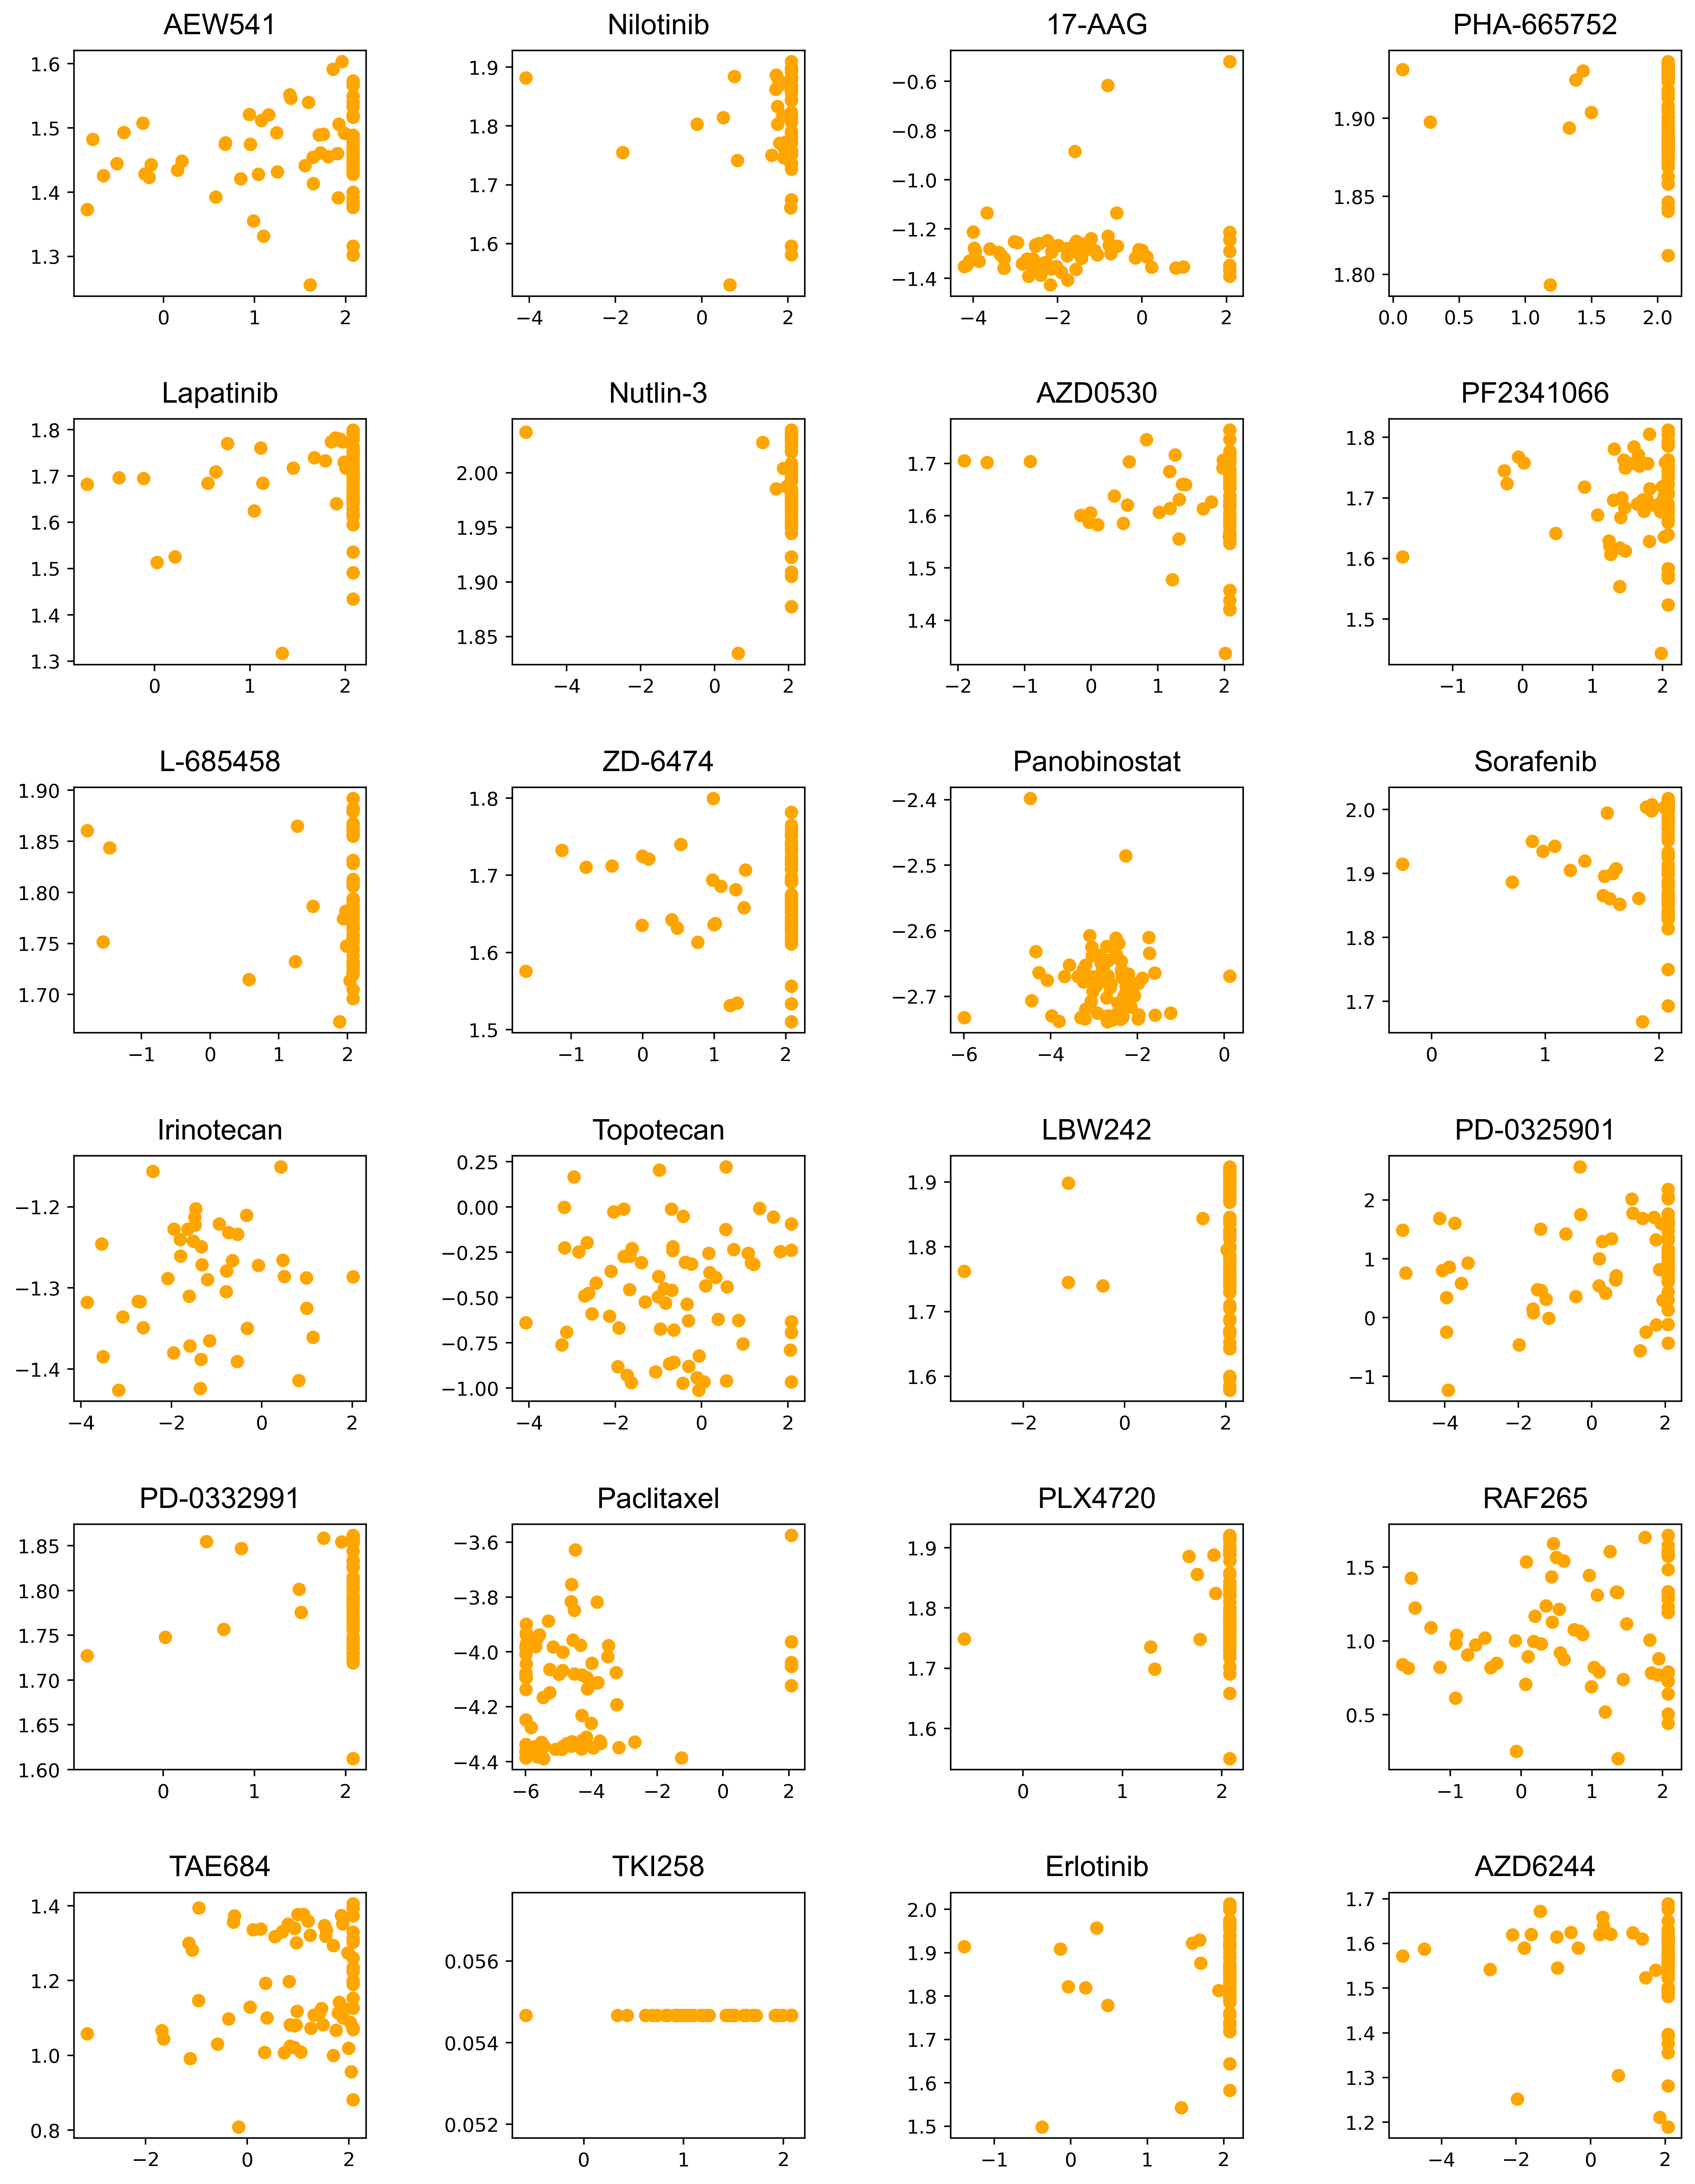

In [4]:
from datetime import datetime
now = datetime.now()
day = now.strftime("%Y%m%d")
print("Starttime: " + day)

rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('%s_//n' % dname)
    # read input file and index file for training and test set
    dataset = np.load(datasetdir + "//MC9K_%s.npz" % dname)
    ss0 = np.load(datasetdir + '//MC9K_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]

    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # data reshape for CNN
    train_X = train_X.reshape(train_X.shape[0], train_X.shape[1],1)
    test_X = test_X.reshape(test_X.shape[0], test_X.shape[1],1)
    
    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # model architecture
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)

    # In[10]:
    with tf.device('/GPU:0'):
        inputs = Input(shape=(train_X.shape[1],1),name='inputs')

        conv_cell_line_1 = Conv1D(filters=50, kernel_size=700, strides=5, activation='tanh')(inputs)
        maxpool_cell_line_1 = MaxPooling1D(pool_size=5)(conv_cell_line_1)
        conv_cell_line_2 = Conv1D(filters=30, kernel_size=5, strides=2, activation='relu')(maxpool_cell_line_1)
        maxpool_cell_line_2 = MaxPooling1D(pool_size=10)(conv_cell_line_2)
        flatten_cell_line = Flatten()(maxpool_cell_line_2)
        dense_cell_line = Dense(100, activation='relu')(flatten_cell_line)
        dropout_cell_line = Dropout(0.1)(dense_cell_line)

        dense_1 = Dense(300, activation='tanh')(dropout_cell_line)
        dropout_1 = Dropout(0.1)(dense_1)
        reshape_1 = Reshape((300, 1))(dropout_1)
        conv_1 = Conv1D(filters=30, kernel_size=150, strides=1, activation='relu')(reshape_1)
        maxpool_1 = MaxPooling1D(pool_size=2)(conv_1)
        conv_2 = Conv1D(filters=10, kernel_size=5, strides=1, activation='relu')(maxpool_1)
        maxpool_2 = MaxPooling1D(pool_size=3)(conv_2)
        conv_3 = Conv1D(filters=5, kernel_size=5, strides=1, activation='relu')(maxpool_2)
        maxpool_3 = MaxPooling1D(pool_size=3)(conv_3)
        dropout_2 = Dropout(0.1)(maxpool_3)
        flatten = Flatten()(dropout_2)
        dropout_3 = Dropout(0.2)(flatten)

        predictions = Dense(1, activation='linear')(dropout_3)



        model = Model(inputs=inputs, outputs=predictions, name='Test_v2_DNN20190327')
        model.compile(loss=keras.losses.mean_squared_error,
                      optimizer=keras.optimizers.Adam(learning_rate),
                      metrics=['mse','mae'])
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    with tf.device('/GPU:0'):
        model_train = model.fit(train_X, train_y, batch_size=batch_size,epochs=training_epochs,verbose=1,
                            validation_data=(test_X, test_y))

    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)
    
    import json
    from keras.models import model_from_json, load_model

    # Option 1: Save Weights + Architecture
    model.save_weights(resultdir+ '//CNN//MC9K_CNN_%s.h5' % dname)
    with open(resultdir + '//CNN//MC9K_CNN_%s.json' % dname, 'w') as f:
        f.write(model.to_json())
    
    
    predicted_classes = model.predict(test_X)
    predicted_value = predicted_classes
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    c.to_csv(resultdir + '//CNN//predicted_table//MC9K_CNN_%s_pred_and_val_result.csv' % dname, index=False)

    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='orange')
    plt.title(dname,fontdict ={'fontsize' : 15},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=10)
    
    num += 1
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    
figdir = "D://indivdual_models//Result//Figure"
plt.savefig(figdir +'//MC9K_single_drug_CNN_plot.png', dpi=400)

In [5]:
now = datetime.now()
day = now.strftime("%Y%m%d")
print("Finished time: " + day)

Finished time: 20221007


In [6]:
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

In [7]:
result

,Drug,RMSE,R2value
0,AEW541,0.852403,0.009064
1,Nilotinib,0.994134,-0.013779
2,17-AAG,1.712889,-0.001988
3,PHA-665752,0.359981,-0.063458
4,Lapatinib,0.633908,0.008034
5,Nutlin-3,0.847794,-0.011924
6,AZD0530,0.890928,-0.029823
7,PF2341066,0.679028,-0.002005
8,L-685458,0.764608,-0.027508
9,ZD-6474,0.856087,-0.004402


In [8]:
result.to_csv(resultdir +'//MC9K_CNN_24drugs_metrics.csv', index=False)